In [ ]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

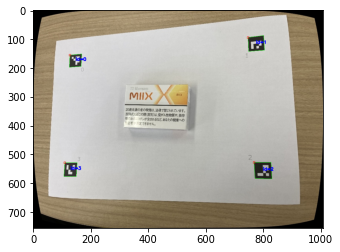

In [ ]:
aruco=cv2.aruco
p_dict=aruco.getPredefinedDictionary(aruco.DICT_4X4_50)#4ブロック×4ブロックを50個使用可能
img = cv2.imread('/content/drive/MyDrive/CVCameraCalibrateImages/D_CalibrationImage/CalibQTobacco.jpg')
corners, ids, rejectedImgPoints = aruco.detectMarkers(img, p_dict) # 検出
img_marked = aruco.drawDetectedMarkers(img.copy(), corners, ids)   # 検出結果をオーバーレイ
img_marked_rgb=cv2.cvtColor(img_marked,cv2.COLOR_BGR2RGB)
plt.imshow(img_marked_rgb)

In [ ]:
corners2 = [np.empty((1,4,2))]*4#[[[a,a],[b,b],[c,c],[d,d]]]*4 値を初期化しない
corners2

[array([[[  0., 100.],
         [200., 300.],
         [400., 500.],
         [600., 700.]]]), array([[[  0., 100.],
         [200., 300.],
         [400., 500.],
         [600., 700.]]]), array([[[  0., 100.],
         [200., 300.],
         [400., 500.],
         [600., 700.]]]), array([[[  0., 100.],
         [200., 300.],
         [400., 500.],
         [600., 700.]]])]

In [ ]:
corners

[array([[[110., 529.],
         [153., 529.],
         [150., 577.],
         [107., 577.]]], dtype=float32), array([[[768., 528.],
         [827., 528.],
         [830., 585.],
         [772., 584.]]], dtype=float32), array([[[128., 156.],
         [169., 152.],
         [167., 195.],
         [126., 198.]]], dtype=float32), array([[[747.,  95.],
         [801.,  88.],
         [804., 139.],
         [749., 143.]]], dtype=float32)]

In [ ]:
ids

array([[3],
       [2],
       [0],
       [1]], dtype=int32)

In [ ]:
ids.ravel()

array([3, 2, 0, 1], dtype=int32)

In [ ]:
for i,c in zip(ids.ravel(), corners):
    corners2[i] = c.copy()

In [ ]:
corners2[0]

array([[[128., 156.],
        [169., 152.],
        [167., 195.],
        [126., 198.]]], dtype=float32)

In [ ]:
corners2[1]

array([[[747.,  95.],
        [801.,  88.],
        [804., 139.],
        [749., 143.]]], dtype=float32)

In [ ]:
corners2[0][0][2]

array([167., 195.], dtype=float32)

In [ ]:
corners2[1][0][3]

array([749., 143.], dtype=float32)

https://plaza.rakuten.co.jp/dobokunoossan/diary/202101240001/

In [ ]:
m = np.empty((4,2))
m

array([[  0., 100.],
       [200., 300.],
       [400., 500.],
       [600., 700.]])

In [ ]:
m[0] = corners2[0][0][2]
m[1] = corners2[1][0][3]
m[2] = corners2[2][0][0]
m[3] = corners2[3][0][1]
marker_coordinates = np.float32(m)#マーカのある四隅の座標を格納
np.float32(m)

array([[167., 195.],
       [749., 143.],
       [768., 528.],
       [153., 529.]], dtype=float32)

In [ ]:
h1=((corners2[0][0][2][0]-corners2[3][0][1][0])**2+(corners2[0][0][2][1]-corners2[3][0][1][1])**2)**0.5
h2=((corners2[2][0][0][0]-corners2[1][0][3][0])**2+(corners2[2][0][0][1]-corners2[1][0][3][1])**2)**0.5
hhh=(h1+h2)/2
print(hhh)

359.8809152327402


In [ ]:
corners2[0][0][2][0]

167.0

In [ ]:
corners2[0][0][2][1]

195.0

In [ ]:
w1=((corners2[0][0][2][0]-corners2[1][0][3][0])**2+(corners2[0][0][2][1]-corners2[1][0][3][1])**2)**0.5
w2=((corners2[2][0][0][0]-corners2[3][0][1][0])**2+(corners2[2][0][0][1]-corners2[3][0][1][1])**2)**0.5
www=(w1+w2)/2
print(www)

599.6596096790515


In [ ]:
width, height = (int(www),int(hhh)) # 変形後画像サイズ 縦横比は上記で計算したピクセルを参考にする。
true_coordinates = np.float32([[0,0],[width,0],[width,height],[0,height]])#実際に表示する画像の座標を格納

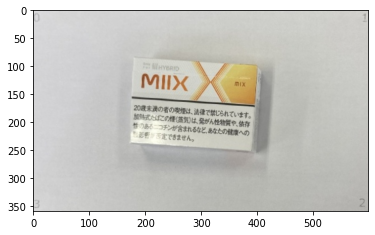

In [ ]:
trans_mat = cv2.getPerspectiveTransform(marker_coordinates,true_coordinates)#変換率
img_trans = cv2.warpPerspective(img,trans_mat,(width, height))#imgを真上から見た画像img_transに変換
img_trans_rgb=cv2.cvtColor(img_trans,cv2.COLOR_BGR2RGB)
plt.imshow(img_trans_rgb)

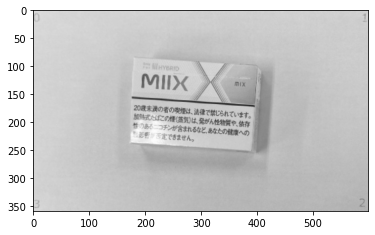

In [ ]:
img_trans_gray=cv2.cvtColor(img_trans,cv2.COLOR_BGR2GRAY)
img_trans_gray_rgb=cv2.cvtColor(img_trans_gray,cv2.COLOR_GRAY2RGB)
plt.imshow(img_trans_gray_rgb)

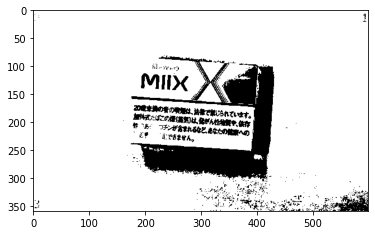

In [ ]:
_,p_binary=cv2.threshold(img_trans_gray,180,255,cv2.THRESH_BINARY)
p_binary_rgb=cv2.cvtColor(p_binary,cv2.COLOR_GRAY2RGB)
plt.imshow(p_binary_rgb)

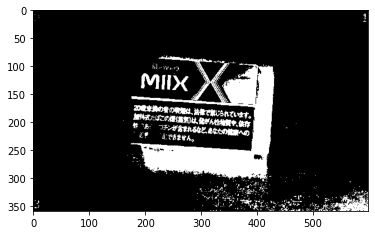

In [ ]:
p_binary=cv2.bitwise_not(p_binary)
plt.imshow(cv2.cvtColor(p_binary,cv2.COLOR_GRAY2RGB))

True

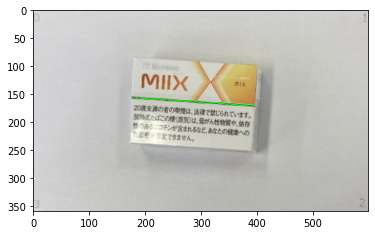

In [ ]:
p_contours,_=cv2.findContours(p_binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
p_and_contours=np.copy(img_trans)
min_p_area=60
large_contours=[cnt for cnt in p_contours if cv2.contourArea(cnt)>min_p_area]
draw_p=cv2.drawContours(p_and_contours,large_contours,-1,(0,255,0))
plt.imshow(cv2.cvtColor(draw_p,cv2.COLOR_BGR2RGB))
cv2.imwrite("draw_p.jpg",draw_p)

In [ ]:
sarea=0
for i, cnts in enumerate(large_contours):
    # 輪郭の面積を計算する。
    area = cv2.contourArea(cnts)
    sarea=sarea+area

In [ ]:
print("総面積={:.2f}cm2".format(sarea*(4.9*12.0)/(www*hhh)))​